# Tutorial 5: Chicago_Sketch

This dataset shows three scenarios of Sketch network, distinguished by their different demand configurations. And this full text will cover the following topics:
* Network data: reading and presentation of core data files
* The primary programme: running the DTA module of path4gmns
* Results: reading and analysing the outcomes

Make sure you have the following libraries installed:

In [1]:
import pandas as pd
import path4gmns as pg
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os

path4gmns, version 0.9.7


## 1. Network data
Before proceeding with the path4GMNS-DTA, you can use pandas to read the input data, to see its format or to make changes as your actual requirements.

In [2]:
mini_path = "./05_Chicago_Sketch/minimum_input/"
node = pd.read_csv(mini_path+'node.csv') 
link = pd.read_csv(mini_path+'link.csv')  
demand = pd.read_csv(mini_path+'demand.csv')  #OD-demand
scenario = pd.read_csv(mini_path+'scenario_index_list.csv')
demand_file_list = pd.read_csv(mini_path+'demand_file_list.csv')

In [3]:
node

node_id  name    x_coord    y_coord  node_type  ctrl_type  zone_id  \
0          1   NaN -87.675591  42.011650        NaN        NaN        1   
1          2   NaN -87.699402  42.003548        NaN        NaN        2   
2          3   NaN -87.664871  41.977436        NaN        NaN        3   
3          4   NaN -87.689873  41.963932        NaN        NaN        4   
4          5   NaN -87.652962  41.932419        NaN        NaN        5   
..       ...   ...        ...        ...        ...        ...      ...   
928      929   NaN -88.518678  41.059063        NaN        NaN        0   
929      930   NaN -87.908988  40.966325        NaN        NaN        0   
930      931   NaN -87.265956  41.155402        NaN        NaN        0   
931      932   NaN -87.130205  41.491239        NaN        NaN        0   
932      933   NaN -87.189745  41.599283        NaN        NaN        0   

                         geometry  
0    POINT (-87.675591 42.011650)  
1    POINT (-87.699402 42.003548)  
2    POINT (-87.664871 41.977436)  
3    POINT (-87.689873 41.963932)  
4    POINT (-87.652962 41.932419)  
..                            ...  
928  POINT (-88.518678 41.059063)  
929  POINT (-87.908988 40.966325)  
930  POINT (-87.265956 41.155402)  
931  POINT (-87.130205 41.491239)  
932  POINT (-87.189745 41.599283)  

[933 rows x 8 columns]

In [4]:
link

link_id  name  from_node_id  to_node_id facility_type  link_type  \
0           1   NaN             1         547       Highway          1   
1           2   NaN             2         548       Highway          1   
2           3   NaN             3         549       Highway          1   
3           4   NaN             4         550       Highway          1   
4           5   NaN             5         551       Highway          1   
...       ...   ...           ...         ...           ...        ...   
2945       76   NaN           931         906       Highway          1   
2946       76   NaN           932         386       Highway          1   
2947       76   NaN           932         515       Highway          1   
2948       76   NaN           933         387       Highway          1   
2949       76   NaN           933         534       Highway          1   

      dir_flag    length  lanes  free_speed  capacity  ref_volume_p1  \
0            1   0.86267      1          60     49500        4989.13   
1            1   0.86267      1          60     49500        6719.41   
2            1   0.86267      1          60     49500       10095.53   
3            1   0.86267      1          60     49500        9444.62   
4            1   0.86267      1          60     49500       17223.82   
...        ...       ...    ...         ...       ...            ...   
2945         1  22.65430      1          60       500         157.00   
2946         1   0.86267      1          60     49500          25.00   
2947         1  10.44260      1          60      5000          22.00   
2948         1   0.86267      1          60     49500        5468.00   
2949         1   6.10762      1          60      3500        5837.00   

                                               geometry  
0     LINESTRING (-87.675575 42.011629, -87.663667 4...  
1     LINESTRING (-87.699386 42.003527, -87.687483 4...  
2     LINESTRING (-87.664855 41.977415, -87.652950 4...  
3     LINESTRING (-87.689857 41.963911, -87.677957 4...  
4     LINESTRING (-87.652946 41.932398, -87.641042 4...  
...                                                 ...  
2945  LINESTRING (-87.265930 41.155405, -87.304036 4...  
2946  LINESTRING (-87.130221 41.491260, -87.142129 4...  
2947  LINESTRING (-87.130194 41.491263, -87.302860 4...  
2948  LINESTRING (-87.189761 41.599304, -87.201669 4...  
2949  LINESTRING (-87.189746 41.599309, -87.308826 4...  

[2950 rows x 13 columns]

In [5]:
demand

o_zone_id  d_zone_id  volume
0               1          1  273.18
1               1          2  347.31
2               1          3  390.81
3               1          4  204.51
4               1          5  373.73
...           ...        ...     ...
142885        387        380   31.00
142886        387        381  572.00
142887        387        382  379.00
142888        387        383   72.00
142889        387        387   80.00

[142890 rows x 3 columns]

In [6]:
scenario

first_column  scenario_index  year scenario_name scenario_description  \
0             0               0  2025          25nb        2025 no built   
1             0               1  2040          2040     2040 future year   

   activate  
0         1  
1         1

Unlike case 03_multi_scenario, the two scenarios in this dataset don't differ in terms of the road network structure, but in terms of the volume of demand (which can be defined in demand_file_list.csv).

In [7]:
demand_file_list

first_column  file_sequence_no  scenario_index_vector   file_name  \
0             0                 1                      0  demand.csv   
1             0                 1                      1  demand.csv   
2             0                 1                      2  demand.csv   

  demand_period mode_type format_type  scale_factor  \
0            am      auto      column           1.0   
1            am      auto      column           1.5   
2            am      auto      column           2.0   

   departure_time_profile_no  comment  
0                          1      NaN  
1                          1      NaN  
2                          1      NaN

Assuming the original demand (in demand.csv) is N, the demand for the three scenarios are N * 1.0, N * 1.5, N * 2.0, respectively.

Draw a physical network diagram to visualize the structure of the road.(The network structure is a little bit complex and may cause your page to lag)

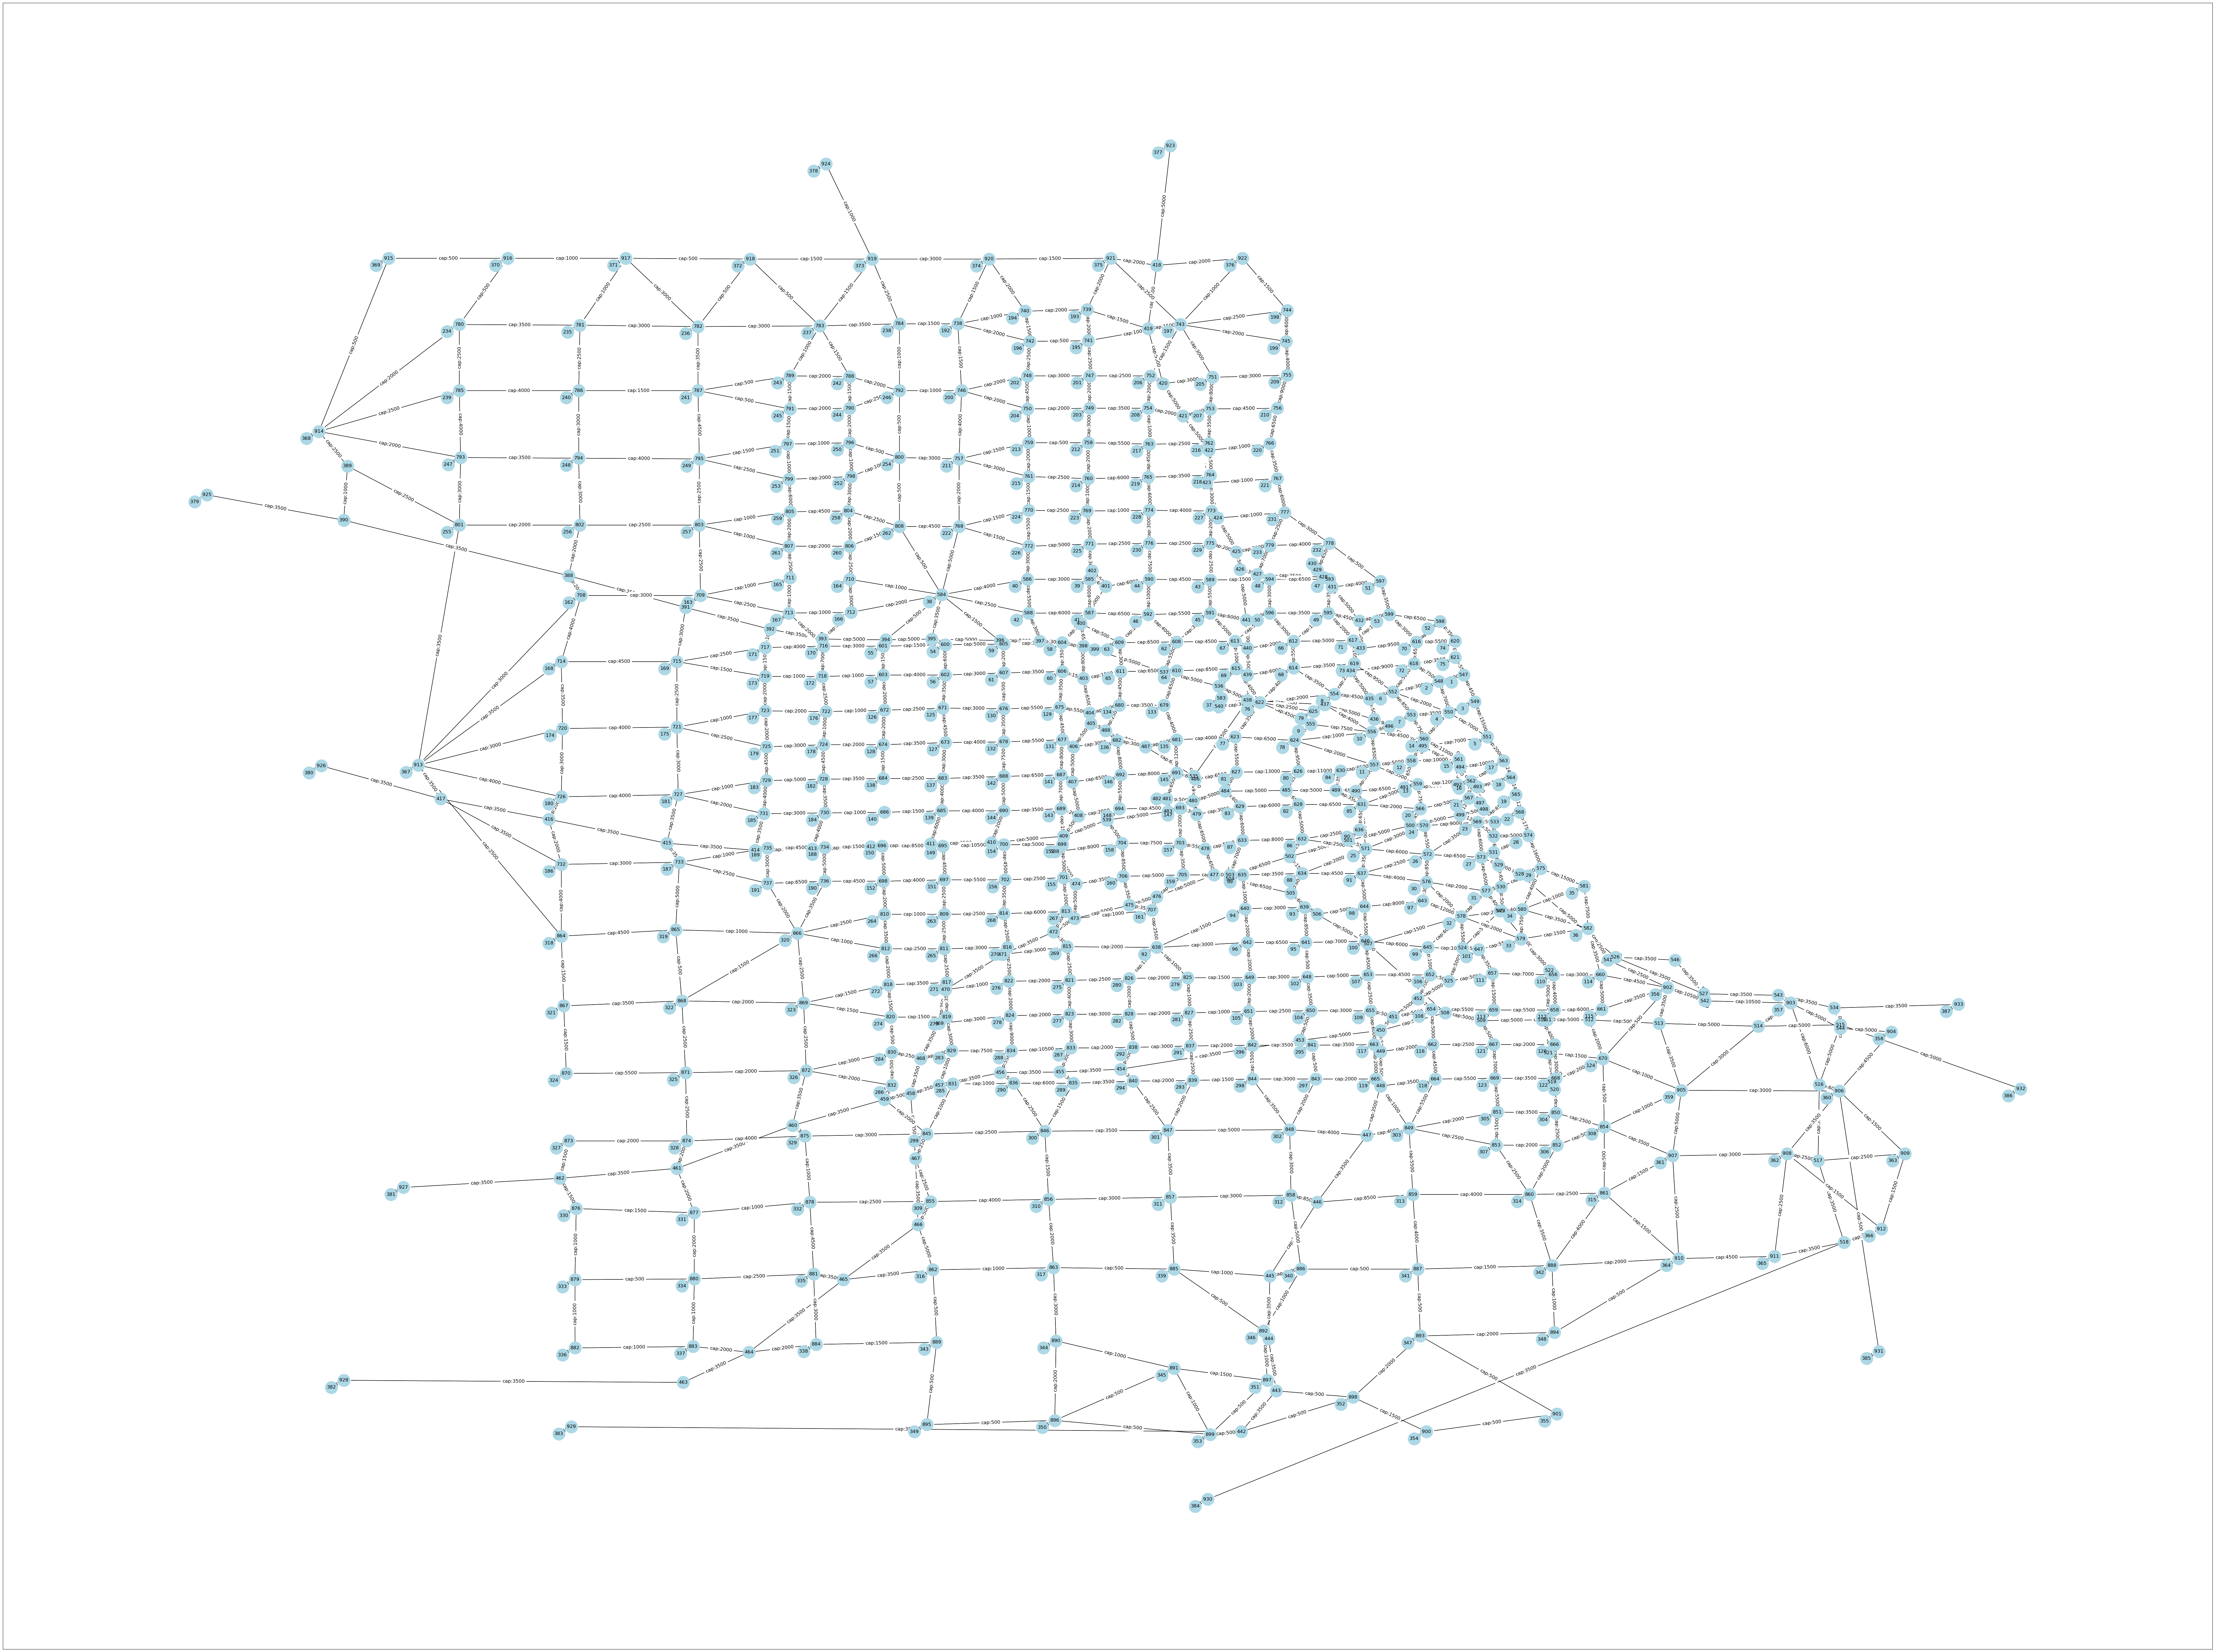

In [10]:
gnode = list(node['node_id'])
glink = list(zip(link['from_node_id'],link['to_node_id']))
G = nx.DiGraph()           # grapgh object
G.add_nodes_from(gnode)
G.add_edges_from(glink)
coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
nlabels = dict(zip(gnode, gnode))

nx.draw_networkx_nodes(G, npos, node_color="lightblue",node_size=1000)  # draw the nodes
nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
nx.draw_networkx_labels(G, npos, nlabels)  # add labels
str_cap = ["cap:"+ str(i) for i in list(link['capacity'])]
edge_labels = dict(zip(glink, str_cap))

nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels, font_size=12) # show the assignment flow result
plt.rcParams['figure.figsize']= (100,75) 

## 2.The main programme
After preparing the data, you can run the DTA module of path4GMNS, which is called in a very simple way as shown below.
To make the programme work properly, you only need to check the data format according to the user-guide document of DTALite, and you do not need to provide any additional parameters.

In [11]:
cd .\05_Chicago_Sketch\minimum_input

C:\Users\Lenovo\path4GMNS_tutorial\05_Chicago_Sketch\minimum_input


In [12]:
pg.run_DTALite()


DTALite run starts

DTALite run completes!


In [13]:
!cd

C:\Users\Lenovo\path4GMNS_tutorial\05_Chicago_Sketch\minimum_input


You can ensure that the program is running correctly by outputting a list of files in the current directory (the directory where pg.dtaapi.run_DTALite is running) and comparing it to the reference output provided by the DTA-user-guide documentation.

In [14]:
files = os.listdir('.')
files

['choice_set_output_0_25nb.csv',
 'choice_set_output_1_2040.csv',
 'demand.csv',
 'demand_file_list.csv',
 'demand_period.csv',
 'departure_time_profile.csv',
 'district_performance_s0_25nb.csv',
 'district_performance_s1_2040.csv',
 'dynamic_traffic_management.csv',
 'final_summary.csv',
 'link.csv',
 'link_performance_s0_25nb.csv',
 'link_performance_s1_2040.csv',
 'link_performance_summary.csv',
 'link_performance_summary_2way.csv',
 'link_type.csv',
 'log_DTA.txt',
 'log_label_correcting.txt',
 'log_main.txt',
 'log_scenario.txt',
 'log_shortest_path_tree.csv',
 'log_simulation.txt',
 'log_subarea_focusing.txt',
 'log_traffic_assignment.csv',
 'model_link.csv',
 'model_node.csv',
 'mode_type.csv',
 'node.csv',
 'od_performance_summary.csv',
 'route_assignment_s0_25nb.csv',
 'route_assignment_s1_2040.csv',
 'scenario_index_list.csv',
 'sensor_data.csv',
 'settings.csv',
 'subarea.csv',
 'system_performance_summary.csv',
 'zonal_hierarchy_mapping.csv']

## 3.Results
### a.Route assignment results
This result is output by the programme in route_assignment_[scenarioname].csv. This part presents the feasible routes between the OD pairs, the traffic assignment of each route after DTA, and other data such as route passing time.

In [15]:
route_assignment_s0 = pd.read_csv('route_assignment_s0_25nb.csv')
route_assignment_s0

first_column  route_seq_id  o_zone_id  d_zone_id  o_super_zone_index  \
NaN             1             1          2          0                   1   
NaN             2             1          3          0                   2   
NaN             3             1          4          0                   3   
NaN             4             1          4          0                   3   
NaN             5             1          5          0                   4   
..            ...           ...        ...        ...                 ...   
NaN        271732           387        380        386                 379   
NaN        271733           387        381        386                 380   
NaN        271734           387        382        386                 381   
NaN        271735           387        383        386                 382   
NaN        271736           387        383        386                 382   

    d_super_zone_index  od_pair_key information_type mode_type  demand_period  \
NaN               1->2            0             auto        am       347.3100   
NaN               1->3            0             auto        am       390.8100   
NaN               1->4            0             auto        am       142.6166   
NaN               1->4            0             auto        am        61.8934   
NaN               1->5            0             auto        am       373.7300   
..                 ...          ...              ...       ...            ...   
NaN           387->380            0             auto        am         3.0104   
NaN           387->381            0             auto        am       572.0000   
NaN           387->382            0             auto        am       379.0000   
NaN           387->383            0             auto        am         3.5998   
NaN           387->383            0             auto        am        68.4002   

     ...                              sequential_link_delay  \
NaN  ...                                 1.388;2.153;1.388;   
NaN  ...                                 1.388;3.833;1.388;   
NaN  ...                           1.388;2.153;4.389;1.388;   
NaN  ...                           1.388;3.833;2.533;1.388;   
NaN  ...                           1.388;3.833;5.005;1.388;   
..   ...                                                ...   
NaN  ...  1.388;9.827;4.757;5.892;8.638;0.708;4.688;5.83...   
NaN  ...  1.388;9.827;2.406;6.481;7.862;5.518;3.337;0.39...   
NaN  ...  1.388;9.827;2.406;6.481;10.808;7.942;4.519;7.2...   
NaN  ...  1.388;9.827;2.406;6.481;10.808;9.154;7.497;10....   
NaN  ...  1.388;9.827;2.406;6.481;10.808;9.154;7.497;10....   

     sequential_link_FFTT  DTM_OD_impact  DTM_path_impact  \
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   
..                    ...            ...              ...   
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   
NaN                     0            NaN              NaN   

     DTM_#_of_lane_closure_links  DTM_new_path_generated  DTM_volume_before  \
NaN                          NaN                     NaN                NaN   
NaN                          NaN                     NaN                NaN   
NaN                          NaN                     NaN                NaN   
NaN                          NaN                     NaN                NaN   
NaN                          NaN                     NaN                NaN   
..                           ...                     ...                ...   
NaN                          NaN                     NaN        

In [16]:
def corr(route_df):
    # The original document has a line first_column, which will cause data misalignment merger
    # Here is to fix the problem of misalignment
    col=list(route_df.columns)
    col.remove('first_column')
    col.append('last')
    dic=dict(zip(list(route_df.columns),col))
    route=route_df.rename(columns=dic)
    return route

Corrected route result:

In [17]:
route_s0 = corr(route_assignment_s0)
route_s0

route_seq_id  o_zone_id  d_zone_id  o_super_zone_index  \
NaN             1          1          2                   0   
NaN             2          1          3                   0   
NaN             3          1          4                   0   
NaN             4          1          4                   0   
NaN             5          1          5                   0   
..            ...        ...        ...                 ...   
NaN        271732        387        380                 386   
NaN        271733        387        381                 386   
NaN        271734        387        382                 386   
NaN        271735        387        383                 386   
NaN        271736        387        383                 386   

     d_super_zone_index od_pair_key  information_type mode_type demand_period  \
NaN                   1        1->2                 0      auto            am   
NaN                   2        1->3                 0      auto            am   
NaN                   3        1->4                 0      auto            am   
NaN                   3        1->4                 0      auto            am   
NaN                   4        1->5                 0      auto            am   
..                  ...         ...               ...       ...           ...   
NaN                 379    387->380                 0      auto            am   
NaN                 380    387->381                 0      auto            am   
NaN                 381    387->382                 0      auto            am   
NaN                 382    387->383                 0      auto            am   
NaN                 382    387->383                 0      auto            am   

       volume  ...                               sequential_link_FFTT  \
NaN  347.3100  ...                                 1.388;2.153;1.388;   
NaN  390.8100  ...                                 1.388;3.833;1.388;   
NaN  142.6166  ...                           1.388;2.153;4.389;1.388;   
NaN   61.8934  ...                           1.388;3.833;2.533;1.388;   
NaN  373.7300  ...                           1.388;3.833;5.005;1.388;   
..        ...  ...                                                ...   
NaN    3.0104  ...  1.388;9.827;4.757;5.892;8.638;0.708;4.688;5.83...   
NaN  572.0000  ...  1.388;9.827;2.406;6.481;7.862;5.518;3.337;0.39...   
NaN  379.0000  ...  1.388;9.827;2.406;6.481;10.808;7.942;4.519;7.2...   
NaN    3.5998  ...  1.388;9.827;2.406;6.481;10.808;9.154;7.497;10....   
NaN   68.4002  ...  1.388;9.827;2.406;6.481;10.808;9.154;7.497;10....   

     DTM_OD_impact  DTM_path_impact  DTM_#_of_lane_closure_links  \
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
..             ...              ...                          ...   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   

     DTM_new_path_generated  DTM_volume_before  DTM_volume_after  \
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
..                      ...                ...               ...   
NaN                     NaN                NaN               NaN   
NaN                     NaN          

In [18]:
route_assignment_s1 = pd.read_csv('route_assignment_s1_2040.csv')
route_s1 = corr(route_assignment_s1)
route_s1

route_seq_id  o_zone_id  d_zone_id  o_super_zone_index  \
NaN             1          1          2                   0   
NaN             2          1          3                   0   
NaN             3          1          4                   0   
NaN             4          1          4                   0   
NaN             5          1          5                   0   
..            ...        ...        ...                 ...   
NaN        446502        387        382                 386   
NaN        446503        387        383                 386   
NaN        446504        387        383                 386   
NaN        446505        387        383                 386   
NaN        446506        387        383                 386   

     d_super_zone_index od_pair_key  information_type mode_type demand_period  \
NaN                   1        1->2                 0      auto            am   
NaN                   2        1->3                 0      auto            am   
NaN                   3        1->4                 0      auto            am   
NaN                   3        1->4                 0      auto            am   
NaN                   4        1->5                 0      auto            am   
..                  ...         ...               ...       ...           ...   
NaN                 381    387->382                 0      auto            am   
NaN                 382    387->383                 0      auto            am   
NaN                 382    387->383                 0      auto            am   
NaN                 382    387->383                 0      auto            am   
NaN                 382    387->383                 0      auto            am   

       volume  ...                               sequential_link_FFTT  \
NaN  520.9650  ...                                 1.388;2.153;1.388;   
NaN  586.2150  ...                                 1.388;3.833;1.388;   
NaN  306.7650  ...                           1.388;2.153;4.389;1.388;   
NaN    0.0000  ...                           1.388;3.833;2.533;1.388;   
NaN  560.5950  ...                           1.388;3.833;5.005;1.388;   
..        ...  ...                                                ...   
NaN   12.4692  ...  1.388;9.827;4.757;1.459;4.123;10.808;9.154;7.4...   
NaN    1.1813  ...  1.388;9.827;2.406;6.481;10.808;9.154;7.497;5.8...   
NaN   11.5249  ...  1.388;9.827;2.406;6.481;10.808;9.154;7.497;10....   
NaN   95.2938  ...  1.388;9.827;2.406;6.481;10.808;9.154;7.497;10....   
NaN    0.0000  ...  1.388;9.827;4.757;1.459;4.123;10.808;9.154;7.4...   

     DTM_OD_impact  DTM_path_impact  DTM_#_of_lane_closure_links  \
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
..             ...              ...                          ...   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   
NaN              0              NaN                          NaN   

     DTM_new_path_generated  DTM_volume_before  DTM_volume_after  \
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
NaN                     NaN                NaN               NaN   
..                      ...                ...               ...   
NaN                     NaN                NaN               NaN   
NaN                     NaN          

In [19]:
route_s0[['route_seq_id','od_pair_key','volume','travel_time','node_sequence']]

route_seq_id od_pair_key    volume  travel_time  \
NaN             1        1->2  347.3100       5.3738   
NaN             2        1->3  390.8100       7.1928   
NaN             3        1->4  142.6166       9.9073   
NaN             4        1->4   61.8934       9.8853   
NaN             5        1->5  373.7300      12.2357   
..            ...         ...       ...          ...   
NaN        271732    387->380    3.0104     166.4841   
NaN        271733    387->381  572.0000     145.8340   
NaN        271734    387->382  379.0000     172.0447   
NaN        271735    387->383    3.5998     164.3565   
NaN        271736    387->383   68.4002     164.3562   

                                         node_sequence  
NaN                                       1;547;548;2;  
NaN                                       1;547;549;3;  
NaN                                   1;547;548;550;4;  
NaN                                   1;547;549;550;4;  
NaN                                   1;547;549;551;5;  
..                                                 ...  
NaN  387;933;534;543;527;526;541;582;580;545;577;57...  
NaN  387;933;534;515;514;513;512;511;510;509;508;45...  
NaN  387;933;534;515;514;905;854;852;860;859;446;85...  
NaN  387;933;534;515;514;905;907;861;888;887;893;89...  
NaN  387;933;534;515;514;905;907;861;888;894;893;89...  

[271736 rows x 5 columns]

In [20]:
route_s1[['route_seq_id','od_pair_key','volume','travel_time','node_sequence']]

route_seq_id od_pair_key    volume  travel_time  \
NaN             1        1->2  520.9650       5.8071   
NaN             2        1->3  586.2150       9.1000   
NaN             3        1->4  306.7650      11.3626   
NaN             4        1->4    0.0000      11.9669   
NaN             5        1->5  560.5950      14.4447   
..            ...         ...       ...          ...   
NaN        446502    387->382   12.4692     226.2291   
NaN        446503    387->383    1.1813     217.1627   
NaN        446504    387->383   11.5249     212.9524   
NaN        446505    387->383   95.2938     212.9524   
NaN        446506    387->383    0.0000     220.0060   

                                         node_sequence  
NaN                                       1;547;548;2;  
NaN                                       1;547;549;3;  
NaN                                   1;547;548;550;4;  
NaN                                   1;547;549;550;4;  
NaN                                   1;547;549;551;5;  
..                                                 ...  
NaN  387;933;534;543;903;514;905;907;861;860;859;44...  
NaN  387;933;534;515;514;905;907;861;860;859;446;44...  
NaN  387;933;534;515;514;905;907;861;888;887;893;89...  
NaN  387;933;534;515;514;905;907;861;888;894;893;89...  
NaN  387;933;534;543;903;514;905;907;861;860;859;44...  

[446506 rows x 5 columns]

### b.Link assignment results
This result is output by the program in link_assignment_[scenarioname].csv, presenting the assignment on the link.

In [21]:
link_performance_s0 = pd.read_csv('link_performance_s0_25nb.csv')
link_performance_s0

link_seq_id  link_id vdf_type  from_node_id  to_node_id  lanes  \
0               1        1      bpr             1         547    1.0   
1               2        2      bpr             2         548    1.0   
2               3        3      bpr             3         549    1.0   
3               4        4      bpr             4         550    1.0   
4               5        5      bpr             5         551    1.0   
...           ...      ...      ...           ...         ...    ...   
2945         2946       76      bpr           931         906    1.0   
2946         2947       76      bpr           932         386    1.0   
2947         2948       76      bpr           932         515    1.0   
2948         2949       76      bpr           933         387    1.0   
2949         2950       76      bpr           933         534    1.0   

      distance_km  distance_mile       fftt  meso_link_id  ...  \
0        1.388036        0.86267   1.388036            -1  ...   
1        1.388036        0.86267   1.388036            -1  ...   
2        1.388036        0.86267   1.388036            -1  ...   
3        1.388036        0.86267   1.388036            -1  ...   
4        1.388036        0.86267   1.388036            -1  ...   
...           ...            ...        ...           ...  ...   
2945    36.450769       22.65430  36.450769            -1  ...   
2946     1.388036        0.86267   1.388036            -1  ...   
2947    16.802143       10.44260  16.802143            -1  ...   
2948     1.388036        0.86267   1.388036            -1  ...   
2949     9.827161        6.10762   9.827161            -1  ...   

      DTM_speed_before  DTM_speed_after DTM_speed_diff  DTM_DoC_before  \
0               59.999              0.0        -59.999           0.101   
1               59.997              0.0        -59.997           0.136   
2               59.984              0.0        -59.984           0.204   
3               59.988              0.0        -59.988           0.191   
4               59.868              0.0        -59.868           0.348   
...                ...              ...            ...             ...   
2945            59.913              0.0        -59.913           0.314   
2946            60.000              0.0        -60.000           0.001   
2947            60.000              0.0        -60.000           0.004   
2948            59.999              0.0        -59.999           0.110   
2949            27.774              0.0        -27.774           1.668   

      DTM_DoC_after  DTM_Doc_diff  DTM_P_before  DTM_P_after  DTM_P_diff  \
0               0.0        -0.101         0.000          0.0      -0.000   
1               0.0        -0.136         0.000          0.0      -0.000   
2               0.0        -0.204         0.002          0.0      -0.002   
3               0.0        -0.191         0.001          0.0      -0.001   
4               0.0        -0.348         0.014          0.0      -0.014   
...             ...           ...           ...          ...         ...   
2945            0.0        -0.314         0.009          0.0      -0.009   
2946            0.0        -0.001         0.000          0.0      -0.000   
2947            0.0        -0.004         0.000          0.0      -0.000   
2948            0.0        -0.110         0.000          0.0      -0.000   
2949            0.0        -1.668         1.712          0.0      -1.712   

             notes  
0     period-based  
1     period-based  
2     period-based  
3     period-based  
4     period-based  
...            ...  
2945  period-based  
2946  period-based  
2947  period-based  
2948  period-based  
2949  period-based  

[2950 rows x 140 columns]

In [22]:
link_performance_s0[['link_id','from_node_id','to_node_id','volume']]

link_id  from_node_id  to_node_id    volume
0           1             1         547   4989.13
1           2             2         548   6719.41
2           3             3         549  10095.53
3           4             4         550   9444.62
4           5             5         551  17223.82
...       ...           ...         ...       ...
2945       76           931         906    157.00
2946       76           932         386     25.00
2947       76           932         515     22.00
2948       76           933         387   5468.00
2949       76           933         534   5837.00

[2950 rows x 4 columns]

In [23]:
link_performance_s1 = pd.read_csv('link_performance_s1_2040.csv')
link_performance_s1

link_seq_id  link_id vdf_type  from_node_id  to_node_id  lanes  \
0               1        1      bpr             1         547    1.0   
1               2        2      bpr             2         548    1.0   
2               3        3      bpr             3         549    1.0   
3               4        4      bpr             4         550    1.0   
4               5        5      bpr             5         551    1.0   
...           ...      ...      ...           ...         ...    ...   
2945         2946       76      bpr           931         906    1.0   
2946         2947       76      bpr           932         386    1.0   
2947         2948       76      bpr           932         515    1.0   
2948         2949       76      bpr           933         387    1.0   
2949         2950       76      bpr           933         534    1.0   

      distance_km  distance_mile       fftt  meso_link_id  ...  \
0        1.388036        0.86267   1.388036            -1  ...   
1        1.388036        0.86267   1.388036            -1  ...   
2        1.388036        0.86267   1.388036            -1  ...   
3        1.388036        0.86267   1.388036            -1  ...   
4        1.388036        0.86267   1.388036            -1  ...   
...           ...            ...        ...           ...  ...   
2945    36.450769       22.65430  36.450769            -1  ...   
2946     1.388036        0.86267   1.388036            -1  ...   
2947    16.802143       10.44260  16.802143            -1  ...   
2948     1.388036        0.86267   1.388036            -1  ...   
2949     9.827161        6.10762   9.827161            -1  ...   

      DTM_speed_before  DTM_speed_after DTM_speed_diff  DTM_DoC_before  \
0               59.995              0.0        -59.995           0.151   
1               59.985              0.0        -59.985           0.204   
2               59.921              0.0        -59.921           0.306   
3               59.940              0.0        -59.940           0.286   
4               59.339              0.0        -59.339           0.522   
...                ...              ...            ...             ...   
2945            59.560              0.0        -59.560           0.471   
2946            60.000              0.0        -60.000           0.001   
2947            60.000              0.0        -60.000           0.007   
2948            59.993              0.0        -59.993           0.166   
2949             8.728              0.0         -8.728           2.502   

      DTM_DoC_after  DTM_Doc_diff  DTM_P_before  DTM_P_after  DTM_P_diff  \
0               0.0        -0.151         0.000          0.0      -0.000   
1               0.0        -0.204         0.002          0.0      -0.002   
2               0.0        -0.306         0.008          0.0      -0.008   
3               0.0        -0.286         0.006          0.0      -0.006   
4               0.0        -0.522         0.071          0.0      -0.071   
...             ...           ...           ...          ...         ...   
2945            0.0        -0.471         0.047          0.0      -0.047   
2946            0.0        -0.001         0.000          0.0      -0.000   
2947            0.0        -0.007         0.000          0.0      -0.000   
2948            0.0        -0.166         0.001          0.0      -0.001   
2949            0.0        -2.502         2.720          0.0      -2.720   

             notes  
0     period-based  
1     period-based  
2     period-based  
3     period-based  
4     period-based  
...            ...  
2945  period-based  
2946  period-based  
2947  period-based  
2948  period-based  
2949  period-based  

[2950 rows x 140 columns]

In [24]:
link_performance_s1[['link_id','from_node_id','to_node_id','volume']]

link_id  from_node_id  to_node_id     volume
0           1             1         547   7483.695
1           2             2         548  10079.115
2           3             3         549  15143.295
3           4             4         550  14166.931
4           5             5         551  25835.730
...       ...           ...         ...        ...
2945       76           931         906    235.500
2946       76           932         386     37.500
2947       76           932         515     33.000
2948       76           933         387   8202.000
2949       76           933         534   8755.500

[2950 rows x 4 columns]

With the link_performance file and network files(link.csv and node.csv), you can use the following code to get the network with assignment flow result on link.

In [25]:
def draw_res(link_s,link_performance_s):
    gnode = list(node['node_id'])
    glink = list(zip(link_s['from_node_id'],link_s['to_node_id']))
    G = nx.DiGraph()           # grapgh object
    G.add_nodes_from(gnode)
    G.add_edges_from(glink)

    coordinates = np.array(list(zip(node['x_coord'],node['y_coord'])))
    npos = dict(zip(gnode,coordinates))  # Get the mapping relationship between nodes and coordinates, represented as a dictionary
    nlabels = dict(zip(gnode, gnode))
    edge_labels = dict(zip(glink, list(link_performance_s['volume'])))

    nx.draw_networkx_nodes(G, npos, node_color="lightblue",node_size=1000)  # draw the nodes
    nx.draw_networkx_edges(G, npos, glink)  # draw the edges(links)
    nx.draw_networkx_labels(G, npos, nlabels)  # add labels
    nx.draw_networkx_edge_labels(G, npos, edge_labels=edge_labels,font_size=12) # show the assignment flow result
    plt.rcParams['figure.figsize']= (100,75) 
    plt.savefig('res.png')

You can try it by yourself, but it may be a bit slow in jupyter notebook:

In [ ]:
draw_res(link,link_performance_s0)

### c.Summary of results
The program outputs various items such as runtime information, assignment results, and system performance to the final_summary.csv file, through which you can get the complete results of each part of the program.

In [26]:
col_names=[str(i) for i in range(53)]
data = pd.read_csv('final_summary.csv',header=None,names=col_names)

In [27]:
display(data.to_string()) # You can take this approach if you want to see the full table, but it's rather unintuitive

'                                                                                                                                          0                                                                                                                                        1                                                        2                            3                                   4                   5                    6                    7                   8               9                 10                   11  12  13   14       15  16  17   18           19  20  21   22         23  24  25   26        27  28  29   30            31  32  33   34         35  36  37    38         39  40  41     42          43  44  45     46        47  48  49     50        51                              52\n0                                                                                    [PROCESS INFO] Step 0: reading scenario_index_list.csv                                          